<a href="https://colab.research.google.com/github/sedavasema/GA/blob/main/%D9%81%D8%B1%D9%88%D8%B4%D9%86%D8%AF%D9%87_%D8%AF%D9%88%D8%B1%D9%87_%DA%AF%D8%B1%D8%AF_%D8%A8%D8%A7_%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85_%DA%98%D9%86%D8%AA%DB%8C%DA%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [7]:
city1=City(2,7)
city2=City(4,5)
city1.distance(city2)
city1.__repr__()

'(2,7)'

In [11]:
cityList=[City(2,7),City(4,5),City(3,2),City(6,4)]
cityList[0].__repr__()

'(2,7)'

In [21]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0

    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [12]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [25]:
route1=createRoute(cityList)
Fitness(route1).routeDistance()
Fitness(route1).routeFitness()

0.06452709800921444

In [27]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [35]:
pop=initialPopulation(10,cityList)

In [79]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [80]:
fitnessResults = {}
fitnessResults[0]=254
fitnessResults[1]=10
for i in range(0,10):
        fitnessResults[i] = Fitness(pop[i]).routeFitness()

In [76]:
popRanked=rankRoutes(pop)

In [81]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [82]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [83]:
#__ Create breed Function
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]
    child = childP1 + childP2
    return child


In [84]:
#__ Create breed Population Function
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [85]:
#__ Mutate Function
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [86]:
#__ Mutate Population
def mutatePopulation(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [87]:
#__ Create Generetion
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [88]:
#__ GA Algorithm Run Function
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        # print(['Generations: ' + str(i) + ': ' + str(1 / rankRoutes(pop)[0][1]]))
        print('At Generations '+ str(i)+ ' the best fitness is '+ str(1 / rankRoutes(pop)[0][1]));
        bestRouteIndex = rankRoutes(pop)[0][0]
        bestRoute = pop[bestRouteIndex]
        plotCities(bestRoute)
        progress.append(1 / rankRoutes(pop)[0][1])
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]

    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

    return bestRoute


In [89]:
#__ Plot Cities Function
def plotCities(best):
   x=[]
   y=[]
   size=len(best)
   for i in range(0,size):
        x.append(best[i].x)
        y.append(best[i].y)
   plt.clf()
   plt.plot(x, y, 'co')
   for i in range(0,size-1):
     plt.arrow(x[i], y[i], x[i+1]-x[i] , y[i+1]-y[i] ,color='r', length_includes_head=True)
   plt.arrow(x[0], y[0], x[size-1]-x[0] , y[size-1]-y[0] ,color='r', length_includes_head=True)
   plt.show()

Initial distance: 732.4579504671741
At Generations 0 the best fitness is 732.4579504671741


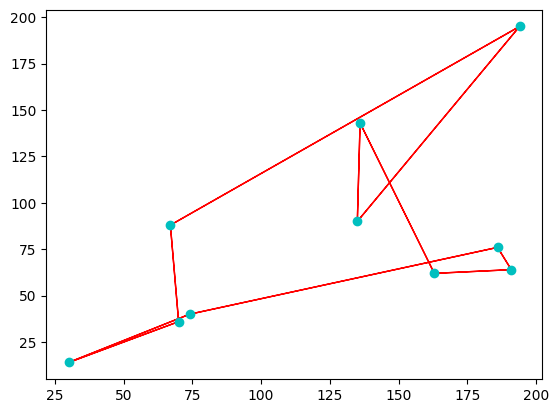

At Generations 1 the best fitness is 717.6747227606475


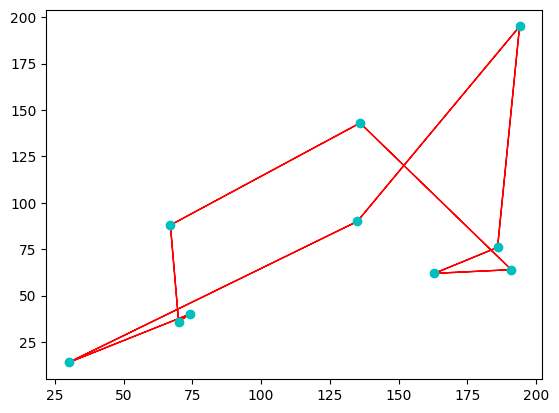

At Generations 2 the best fitness is 615.1635541480816


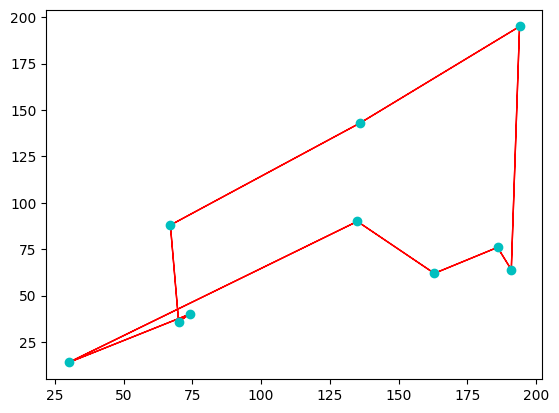

At Generations 3 the best fitness is 615.1635541480816


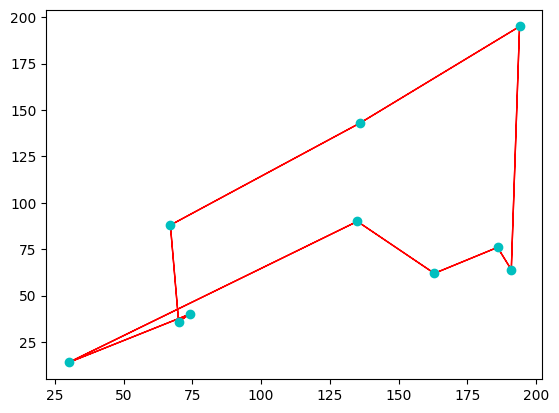

At Generations 4 the best fitness is 615.1635541480816


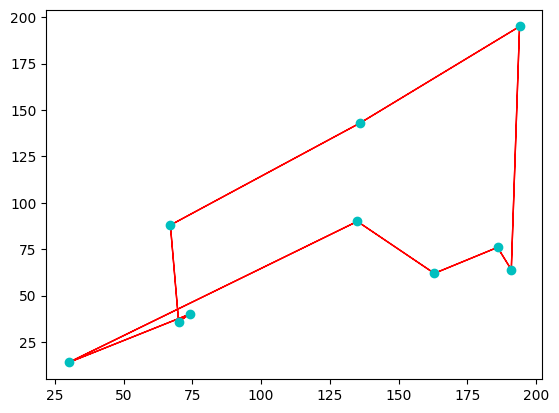

At Generations 5 the best fitness is 615.1635541480816


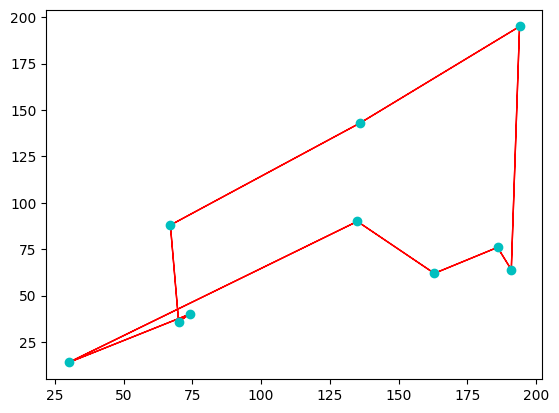

At Generations 6 the best fitness is 615.1635541480816


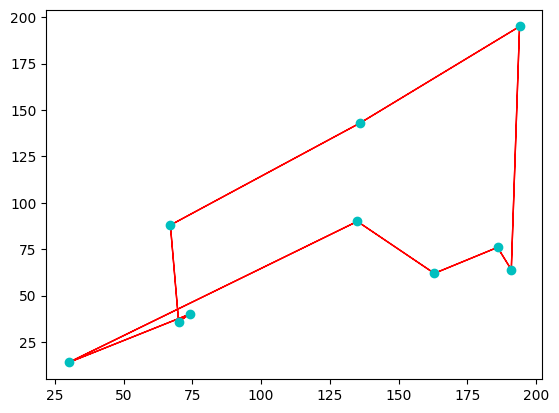

At Generations 7 the best fitness is 615.1635541480816


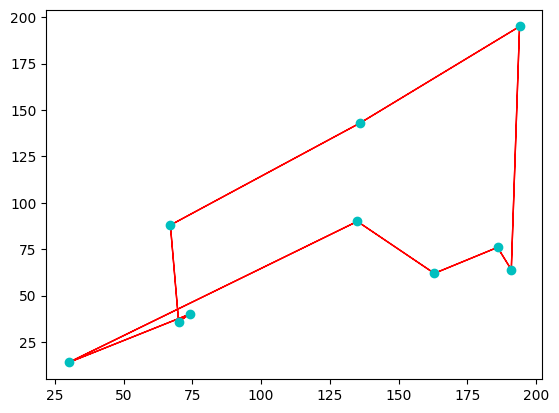

At Generations 8 the best fitness is 613.9647644394978


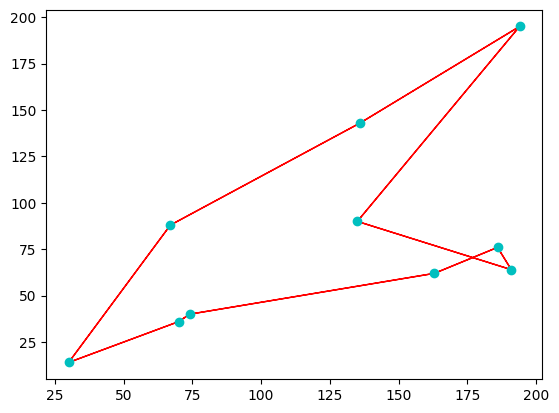

At Generations 9 the best fitness is 601.1084981406331


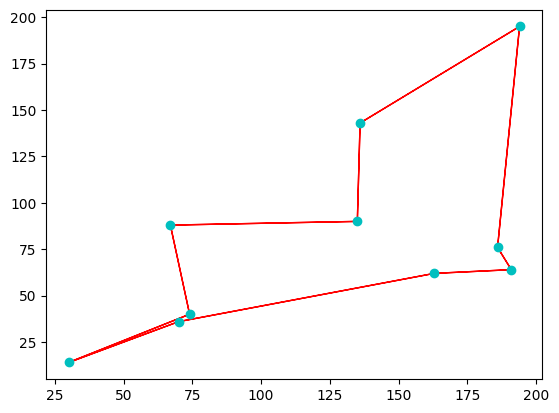

Final distance: 601.1084981406331


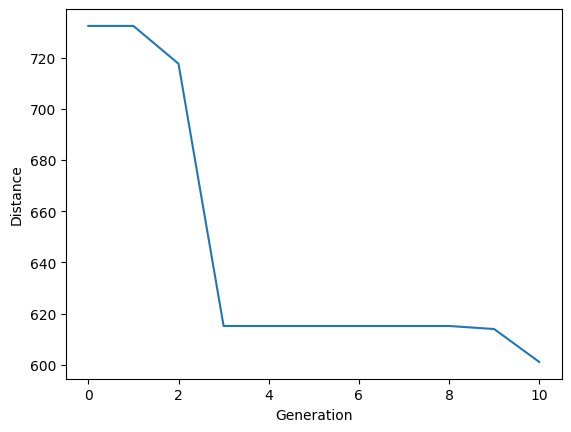

In [91]:
#__ Main Program to call Functions
cityList = []

# with open('./data/att48.txt') as f:
#    for line in f.readlines():
#      city = line.split(' ')
#      cityList.append(City(x=int(city[1]), y=int(city[2])))


for i in range(0,10):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

bestroute=geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=10)
